# Section 1 - K-Means

## 1.1 Euclidean Distance

### 1.1.a 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

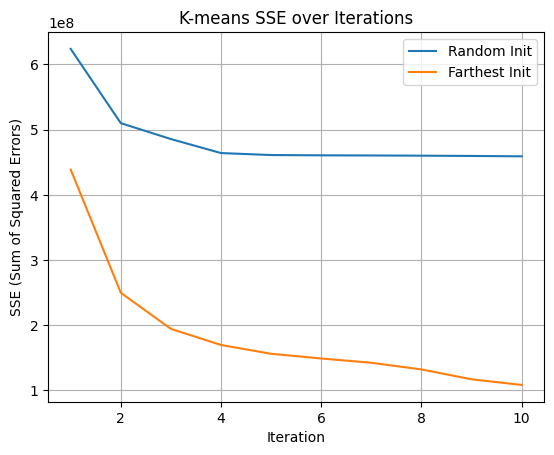

In [2]:
f_data=open('HW4_data/data.txt','r')
f_init_farthest=open('HW4_data/init_farthest.txt','r')
f_init_random=open('HW4_data/init_random.txt','r')
data=np.array([[float(x) for x in line.split()]for line in f_data])
farthest=np.array([[float(y) for y in line.split()]for line in f_init_farthest])
random=np.array([[float(z) for z in line.split()]for line in f_init_random])

def compute_sse(data,centers,labels):
    sse=0
    for i, point in enumerate(data):
        center=centers[labels[i]]
        sse += np.sum((point - center)**2)
    return sse

def kmeans(data,init_centers,max_iter=10):
    centers=init_centers.copy()
    sse_list=[]

    for _ in range(max_iter):
        distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)

        # 計算 SSE
        sse = compute_sse(data, centers, labels)
        sse_list.append(sse)

        # 更新中心
        new_centers = np.array([
            data[labels == k].mean(axis=0) if np.any(labels == k) else centers[k]
            for k in range(len(centers))
        ])

         # 若中心不再改變就提前結束
        if np.allclose(new_centers, centers):
            break

        centers = new_centers

    return sse_list



sse_random = kmeans(data, random)
sse_farthest = kmeans(data, farthest)

plt.plot(range(1, len(sse_random)+1), sse_random, label="Random Init")
plt.plot(range(1, len(sse_farthest)+1), sse_farthest, label="Farthest Init")
plt.xlabel("Iteration")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("K-means SSE over Iterations")
plt.legend()
plt.grid(True)
plt.show()

### 1.1.b 

In [3]:
#random
sse_random_change=(sse_random[0]-sse_random[9])/sse_random[0]
#farthest
sse_farthest_change=(sse_farthest[0]-sse_farthest[9])/sse_farthest[0]
print("sse_random:",sse_random_change)
print("sse_farthest:",sse_farthest_change)

sse_random: 0.26398863292044183
sse_farthest: 0.7525973243724756


## 1.2 Manhattan Distance

### 1.2.a 

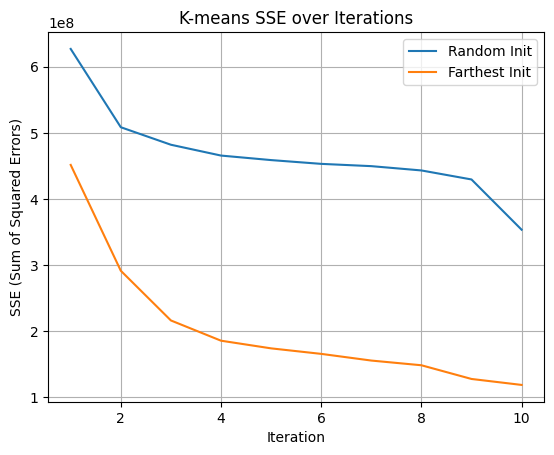

In [4]:
f_data=open('HW4_data/data.txt','r')
f_init_farthest=open('HW4_data/init_farthest.txt','r')
f_init_random=open('HW4_data/init_random.txt','r')
data=np.array([[float(x) for x in line.split()]for line in f_data])
farthest=np.array([[float(y) for y in line.split()]for line in f_init_farthest])
random=np.array([[float(z) for z in line.split()]for line in f_init_random])

def compute_sse(data,centers,labels):
    sse=0
    for i, point in enumerate(data):
        center=centers[labels[i]]
        sse += np.sum((point - center)**2)
    return sse

def kmeans(data,init_centers,max_iter=10):
    centers=init_centers.copy()
    sse_list=[]

    for _ in range(max_iter):
        distances = np.sum(np.abs(data[:, np.newaxis] - centers), axis=2)
        labels = np.argmin(distances, axis=1)

        # 計算 SSE
        sse = compute_sse(data, centers, labels)
        sse_list.append(sse)

        # 更新中心
        new_centers = np.array([
            data[labels == k].mean(axis=0) if np.any(labels == k) else centers[k]
            for k in range(len(centers))
        ])

         # 若中心不再改變就提前結束
        if np.allclose(new_centers, centers):
            break

        centers = new_centers

    return sse_list

import matplotlib.pyplot as plt

sse_random = kmeans(data, random)
sse_farthest = kmeans(data, farthest)

plt.plot(range(1, len(sse_random)+1), sse_random, label="Random Init")
plt.plot(range(1, len(sse_farthest)+1), sse_farthest, label="Farthest Init")
plt.xlabel("Iteration")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("K-means SSE over Iterations")
plt.legend()
plt.grid(True)
plt.show()

### 1.2.b 

In [5]:
#random
sse_random_change=(sse_random[0]-sse_random[9])/sse_random[0]
#farthest
sse_farthest_change=(sse_farthest[0]-sse_farthest[9])/sse_farthest[0]
print("sse_random:",sse_random_change)
print("sse_farthest:",sse_farthest_change)

sse_random: 0.4361887445987642
sse_farthest: 0.7370975593135732


# Section 2 - Various Clustering Methods

## 2.1 Preprocess

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
df=pd.read_csv("HW4_data/Iris.csv")
#display(df)
X=df.drop(['Id','Species'],axis=1)
Y=df['Species']
#display(X)
#display(Y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

#display(X_scaled)


## 2.2 PCA Visualization

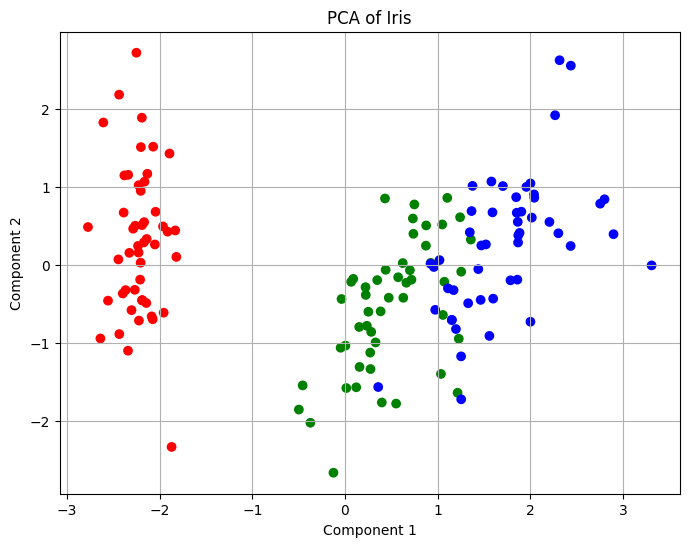

In [35]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(X_scaled)

color_dict = {'Iris-setosa': 'r', 'Iris-versicolor': 'g', 'Iris-virginica': 'b'}

colors = Y.map(color_dict)

plt.figure(figsize=[8,6])
plt.scatter(x_pca[:,0],x_pca[:,1],c=colors)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PCA of Iris")
plt.grid(True)
plt.show()

## 2.3 Other Methods

In [22]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.mixture import GaussianMixture

In [ ]:
df=pd.read_csv("HW4_data/Iris.csv")
X=df.drop(['Id','Species'],axis=1)
X=np.array(X)
y=df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}).values
#K-means
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
kmeans_label=kmeans.labels_
#DBSCAN
dbscan=DBSCAN()
dbscan.fit_predict(X)
dbscan_label = dbscan.labels_
#GMM
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X)
gmm_label=gmm.predict(X)

### 2.3.a 

In [25]:
from sklearn.metrics import adjusted_rand_score

In [33]:
ari_kmeans = adjusted_rand_score(y, kmeans_label)
ari_dbscan = adjusted_rand_score(y, dbscan_label)
ari_gmm = adjusted_rand_score(y, gmm_label)
print(f"KMeans ARI:{ari_kmeans:.3f}\nDBSCAN ARI:{ari_dbscan:.3f}\nGMM ARI:{ari_gmm:.3f}")

KMeans ARI:0.716
DBSCAN ARI:0.521
GMM ARI:0.904


### 2.3.b

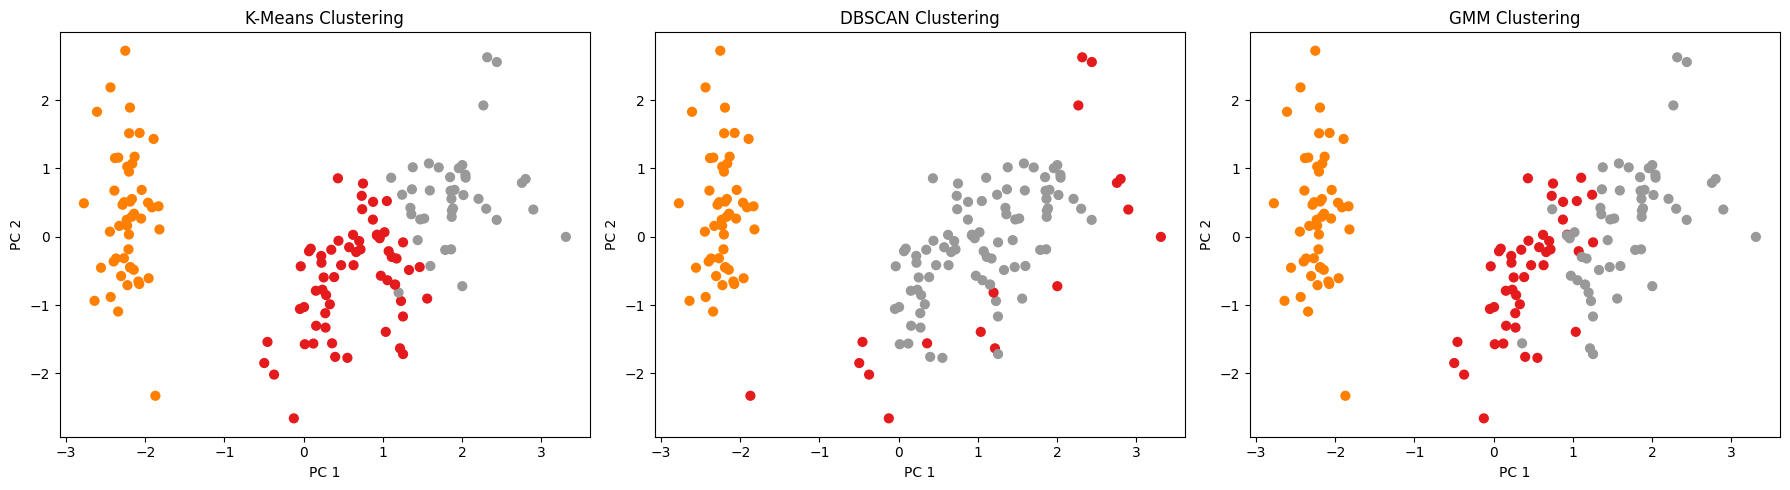

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

titles = ['K-Means Clustering', 'DBSCAN Clustering', 'GMM Clustering']
labels_list = [kmeans_label, dbscan_label, gmm_label]

for ax, title, labels in zip(axes, titles, labels_list):
    scatter = ax.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap='Set1', s=40)
    ax.set_title(title)
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')

plt.tight_layout()
plt.show()

### 2.3.c